I am going to use the following metric functions
1. closeness
2. degree
3. betweenness

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv
import algos as al
import metrics as me

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

In [5]:
projects = [(star_proj, "Star-Structured Project"), 
            (full_proj, "Fully-connected Structured Project"), 
            (chain_proj, "Chain-Structured Project")]

metric_fn = me.compute_closeness_centrality

y_greedy = []
y_greedy_leader = []
y_inf_greedy = []
y_inf_greedy_leader = []
y_inf = []
y_inf_leader = []
# y_random = []

beta = None

network_main = pickle.load(open(f"./networks/net_2_subnets/10_nodes.pkl", 'rb')).copy()
for project in projects:
    network = ps.remove_edges_based_on_project_network(network_main.copy(), project[0])
    network = ps.add_weights(network.copy(), alpha=1.0, criterion='min')
    print(f"*********** {project[1]} ***********")

    # Greedy
    print("\n--------      Using Greedy Strategy     -------\n")
    obj_max_1 = 0.0
    best_set_1 = set()
    for node in network.copy().nodes():
        subset, comm_eff = al.Greedy(network.copy(), project[0], node, metric_fn=metric_fn, beta=beta)
        if comm_eff > obj_max_1:
            obj_max_1 = comm_eff
            best_set_1 = subset

    leaders_eff_1 = ps.sum_edge_weights(network.copy().subgraph(best_set_1))
    print("Coordinators communication efficiency", leaders_eff_1)
    # print(f"Objective value : {obj_max_1}")
    # team_eff_1 = round(obj_max_1 - leaders_eff_1, 4)

    y_greedy.append(obj_max_1)
    y_greedy_leader.append(leaders_eff_1)

    for node in best_set_1:
        print(f"Team :{network.copy().nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network.copy(), node)}")
    

    # Influence Greedy
    print("\n--------      Using influence Greedy Strategy     -------\n")
    obj_max_2 = 0.0
    best_set_2 = set()
    print("Influential First")
    influential_nodes = ps.get_top_ranked_node_each_group(network.copy())
    for node in influential_nodes:
        subset, comm_eff = al.Greedy(network.copy(), project[0], node, metric_fn=metric_fn, beta=beta)
        if comm_eff > obj_max_2:
            obj_max_2 = comm_eff
            best_set_2 = subset

    leaders_eff_2 = ps.sum_edge_weights(network.copy().subgraph(best_set_2))
    print("Coordinators communication efficiency", leaders_eff_2)
    print(f"Objective value : {obj_max_2}")

    y_inf_greedy.append(obj_max_2)
    y_inf_greedy_leader.append(leaders_eff_2) 

    for node in best_set_2:
        print(f"Team :{network.copy().nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network.copy(), node)}")

    # Influence 
    print("\n--------      Using influence Strategy     -------\n")
    influential_nodes = ps.get_top_ranked_node_each_group(network.copy())
    influence_net = network.copy().subgraph(influential_nodes)
    local_influence = 0
    for node in influential_nodes:
        local_influence += ps.average_weight_of_adjacent_nodes(influence_net, node)
    influence_score = ps.sum_edge_weights(influence_net) + local_influence

    y_inf.append(influence_score)
    y_inf_leader.append(ps.sum_edge_weights(influence_net))

    for node in influential_nodes:
        print(f"Team :{network.copy().nodes[node]['label']}, Node: {node}, Rank: {ps.get_node_rank(network.copy(), node)}")

    # # Random 
    # print("\n--------      Using Random Strategy     -------\n")
    # average_weight = ps.randomMonteCarlo(network.copy(), 1000)
    # y_random.append(average_weight)


print(f"y_greedy = {y_greedy}")
print(f"y_inf_greedy = {y_inf_greedy}")
print(f"y_inf = {y_inf}")
# print(f"y_random: {y_random}")
print(f"y_inf_leader: {y_inf_leader}")
print(f"y_inf_greedy_leader = {y_inf_greedy_leader}")
print(f"y_greedy_leader = {y_greedy_leader}")

*********** Star-Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 0.0
Team :AI, Node: Carlos Agra Coelho, Rank: 1
Team :DM, Node: Hongyu Guo, Rank: 1
Team :DB, Node: Dimitri Tombroff, Rank: 1
Team :T, Node: Dines Bjørner, Rank: 1

--------      Using influence Greedy Strategy     -------

Influential First
Coordinators communication efficiency 0.0
Objective value : 600.0
Team :AI, Node: Carlos Agra Coelho, Rank: 1
Team :DM, Node: Hongyu Guo, Rank: 1
Team :DB, Node: Dimitri Tombroff, Rank: 1
Team :T, Node: Dines Bjørner, Rank: 1

--------      Using influence Strategy     -------

Team :DB, Node: Dimitri Tombroff, Rank: 1
Team :AI, Node: Carlos Agra Coelho, Rank: 1
Team :T, Node: Dines Bjørner, Rank: 1
Team :DM, Node: Hongyu Guo, Rank: 1
*********** Fully-connected Structured Project ***********

--------      Using Greedy Strategy     -------

Coordinators communication efficiency 0.0
Team :AI, Node: Carlos Agra Coel

In [4]:
projects = [(star_proj, "Star-Structured Project"), 
            (full_proj, "Fully-connected Structured Project"), 
            (chain_proj, "Chain-Structured Project")]

beta = None
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb')).copy()
print("Influential First")
influential_nodes = ps.get_top_ranked_node_each_group(network_main.copy())
for node in influential_nodes:
    subset, comm_eff = al.Greedy(network_main.copy(), projects[0][0], node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

total_inf = sum(al.leader_eff(network_main.copy(), projects[0][0], metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, projects[0][0], metric_fn, node)}")

Influential First
Coordinators communication efficiency 581.0647364331575
Objective value : 1485.6899
Intra-team ranking
Team :DB, Node: Yosihisa Udagawa, Rank: 6
Team :DM, Node: Yabo Xu, Rank: 7
Team :AI, Node: Eiji Takimoto, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 1


Inter-team ranking
Team :DB, Node: Yosihisa Udagawa, Rank: 6
Team :DM, Node: Yabo Xu, Rank: 3
Team :AI, Node: Eiji Takimoto, Rank: 2
Team :T, Node: F. Bruce Shepherd, Rank: 14


In [5]:
projects = [(star_proj, "Star-Structured Project"), 
            (full_proj, "Fully-connected Structured Project"), 
            (chain_proj, "Chain-Structured Project")]

beta = None
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb')).copy()
print("Greedy Algorithm")
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), projects[0][0], node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

total_inf = sum(al.leader_eff(network_main.copy(), projects[0][0], metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, projects[0][0], metric_fn, node)}")

Greedy Algorithm
Coordinators communication efficiency 581.0647364331573
Objective value : 1495.8973
Intra-team ranking
Team :DB, Node: Witold Staniszkis, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 1
Team :AI, Node: Eiji Takimoto, Rank: 1
Team :DM, Node: Haibin Cheng, Rank: 10


Inter-team ranking
Team :DB, Node: Witold Staniszkis, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 14
Team :AI, Node: Eiji Takimoto, Rank: 2
Team :DM, Node: Haibin Cheng, Rank: 2


In [ ]:
projects = [(star_proj, "Star-Structured Project"), 
            (full_proj, "Fully-connected Structured Project"), 
            (chain_proj, "Chain-Structured Project")]

beta = None
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb')).copy()
print("Greedy Algorithm")
influential_nodes = ps.get_top_ranked_node_each_group(network_main.copy())
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), projects[0][0], node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

total_inf = sum(al.leader_eff(network_main.copy(), projects[0][0], metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
print(f"Objective value : {obj_max_2}")
print("\n")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, projects[0][0], metric_fn, node)}")

In [5]:
list(best_set_2)

['Eiji Takimoto', 'Yabo Xu', 'Giovanni Maria Sacco', 'F. Bruce Shepherd']

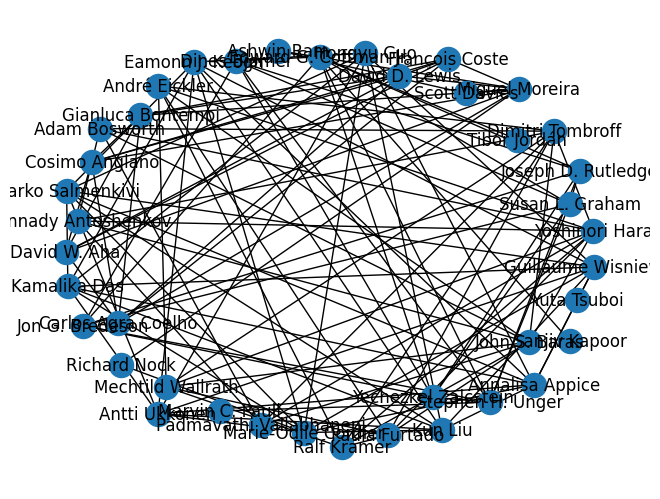

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Plot the network_main graph
nx.draw(network_main, with_labels=True)
plt.show()